**QUESTION 2**

Epilepsy is a nervous system disorder that affects movement. The dataset contains 195 records of various people with 23 features that contain biomedical measurements. Your model will be used to differentiate healthy people from people having the disease. Target Column is 'status'. Identify the model with the best params. Please note: Visualisation is mandatory. You will receive 0 marks if you do not add visualisation.

Data link - https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms

In [4]:
epilepsy = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data")

In [5]:
epilepsy.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
epilepsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
epilepsy.shape

(195, 24)

In [8]:
epilepsy.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


**Dealing with null values**

In [9]:
epilepsy.isnull().sum().sort_values(ascending=False).head()

MDVP:PPQ      2
Jitter:DDP    1
name          0
MDVP:APQ      0
D2            0
dtype: int64

In [10]:
epilepsy.isnull().sum().sum()

3

In [11]:
(epilepsy.isnull().sum()/len(epilepsy)*100).sort_values(ascending=False).head()

MDVP:PPQ      1.025641
Jitter:DDP    0.512821
name          0.000000
MDVP:APQ      0.000000
D2            0.000000
dtype: float64

In [12]:
epilepsy['MDVP:PPQ'].fillna(epilepsy['MDVP:PPQ'].mean(), inplace=True)

In [13]:
epilepsy['MDVP:PPQ'].isnull().sum()

0

In [14]:
epilepsy['Jitter:DDP'].fillna(epilepsy['Jitter:DDP'].mean(), inplace=True)

In [15]:
epilepsy['Jitter:DDP'].isnull().sum()

0

In [16]:
epilepsy.isnull().sum().sort_values(ascending=False).head()

name           0
MDVP:Fo(Hz)    0
D2             0
spread2        0
spread1        0
dtype: int64

**Our Target Column is 'status' & It consist of 0 and 1 values.**

In [17]:
epilepsy['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

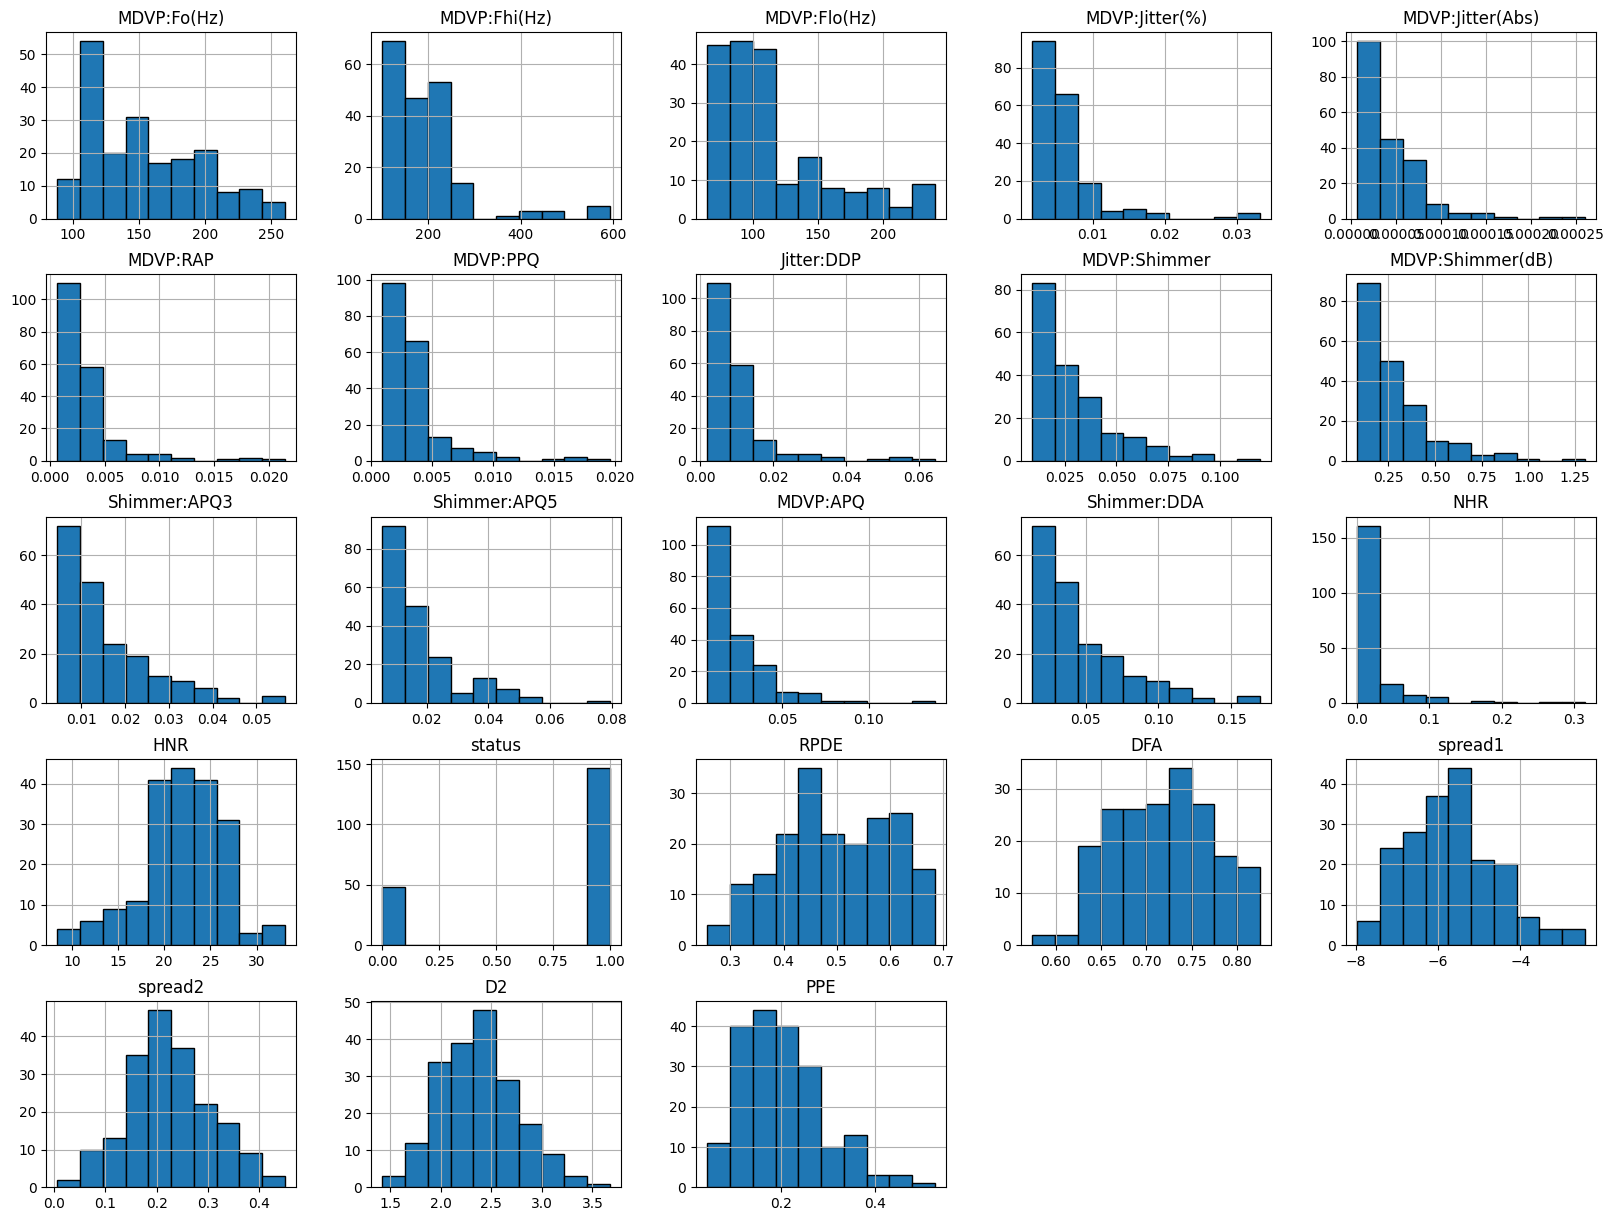

In [18]:
epilepsy.hist(figsize=(20,15), edgecolor='black')


We get an overview about our data through visualization.

In [19]:
# sns.displot(epilepsy['MDVP:Flo(Hz)'], kde=True, bins=20, stat="density")
# sns.displot(epilepsy['MDVP:Fo(Hz)'], kde=True, bins=20, stat="density")
# sns.displot(epilepsy['MDVP:Fhi(Hz)'],kde=True, bins=20, stat="density")

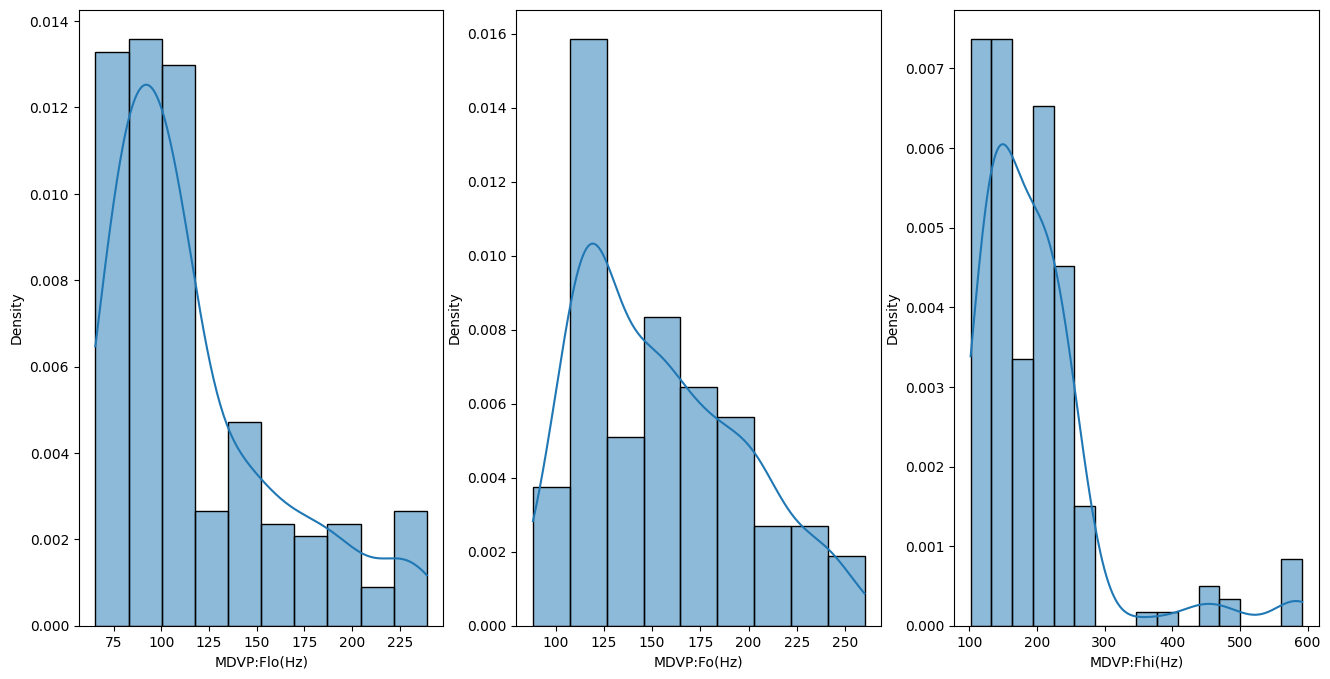

In [20]:
fig, ax = plt.subplots(1,3,figsize=(16,8))
sns.histplot(epilepsy['MDVP:Flo(Hz)'],ax=ax[0], kde=True, stat="density")
sns.histplot(epilepsy['MDVP:Fo(Hz)'],ax=ax[1], kde=True, stat="density")
sns.histplot(epilepsy['MDVP:Fhi(Hz)'],ax=ax[2], kde=True, stat="density")
plt.show()

**Observations:**

1 . We can observe that there is a positive skewness for minimum vocal fundemental frequency.
2 . The average vocal frequency is almost normally distributed.

<Axes: xlabel='HNR', ylabel='Density'>

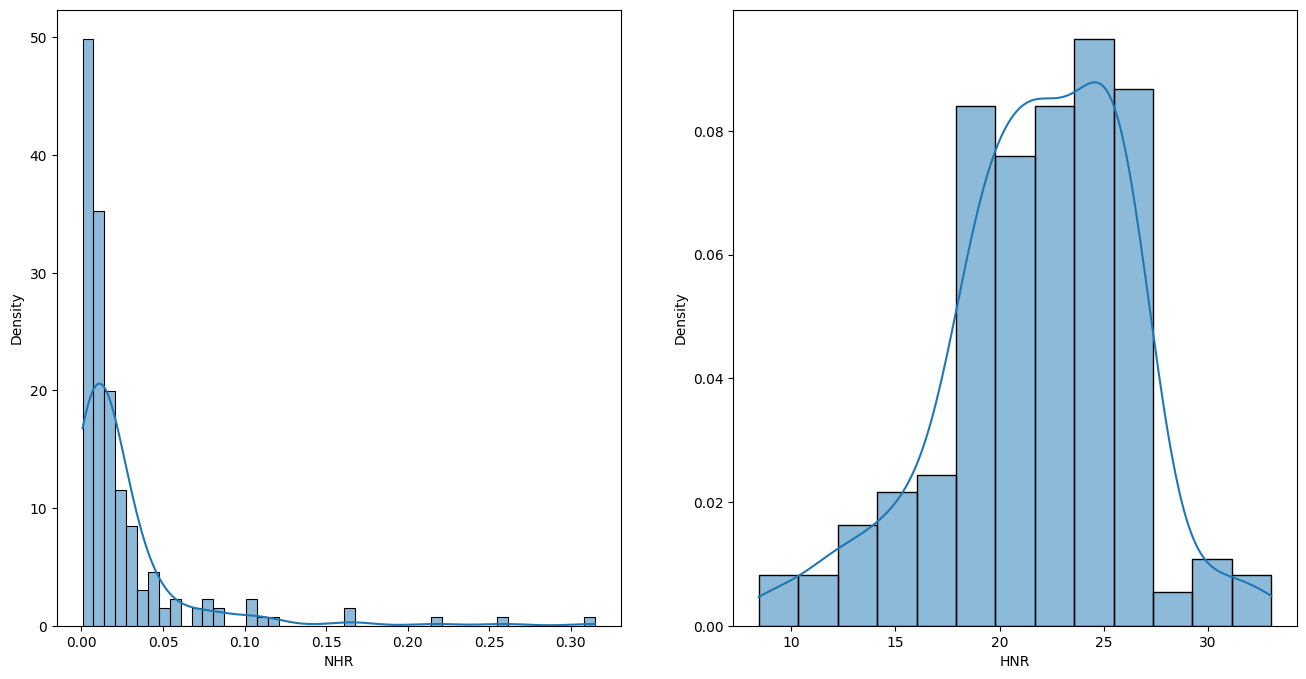

In [21]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.histplot(epilepsy['NHR'],ax=ax[0], kde=True, stat="density")
sns.histplot(epilepsy['HNR'],ax=ax[1], kde=True, stat="density")

<Axes: xlabel='spread1', ylabel='Density'>

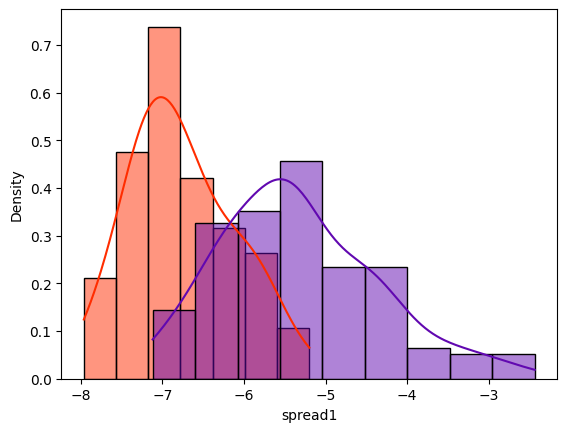

In [22]:
sns.histplot( epilepsy[epilepsy['status'] == 0]['spread1'], color = '#FF2D00', kde=True, stat= "density")
sns.histplot( epilepsy[epilepsy['status'] == 1]['spread1'], color = '#6108B0', kde=True, stat= "density")

<Axes: xlabel='status', ylabel='count'>

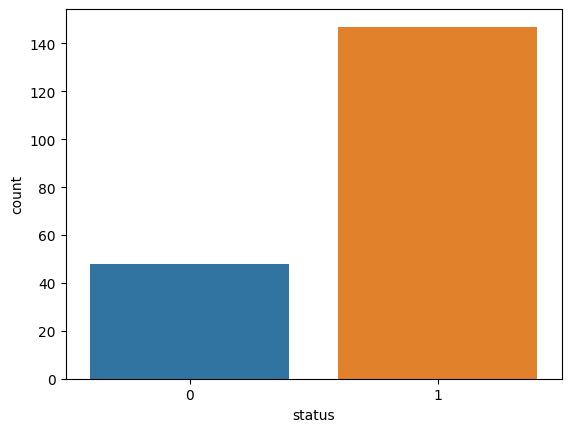

In [23]:
sns.countplot(x='status',data=epilepsy)

In [24]:
epilepsy.drop("name", axis=1, inplace=True)

In [25]:
epilepsy.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.101266,-0.075655,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.093977,0.097341,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.089388,-0.101828,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.970704,0.989980,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.892777,0.922525,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.954689,0.999808,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.101266,0.093977,-0.089388,0.970704,0.892777,0.954689,1.000000,0.954295,0.794065,0.835676,...,0.759840,0.842792,-0.723367,0.275859,0.325814,0.195817,0.707773,0.396134,0.402061,0.762118
Jitter:DDP,-0.075655,0.097341,-0.101828,0.989980,0.922525,0.999808,0.954295,1.000000,0.758949,0.790076,...,0.744103,0.919240,-0.720352,0.267500,0.341062,0.064110,0.647807,0.324435,0.427402,0.670209
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.794065,0.758949,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.835676,0.790076,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


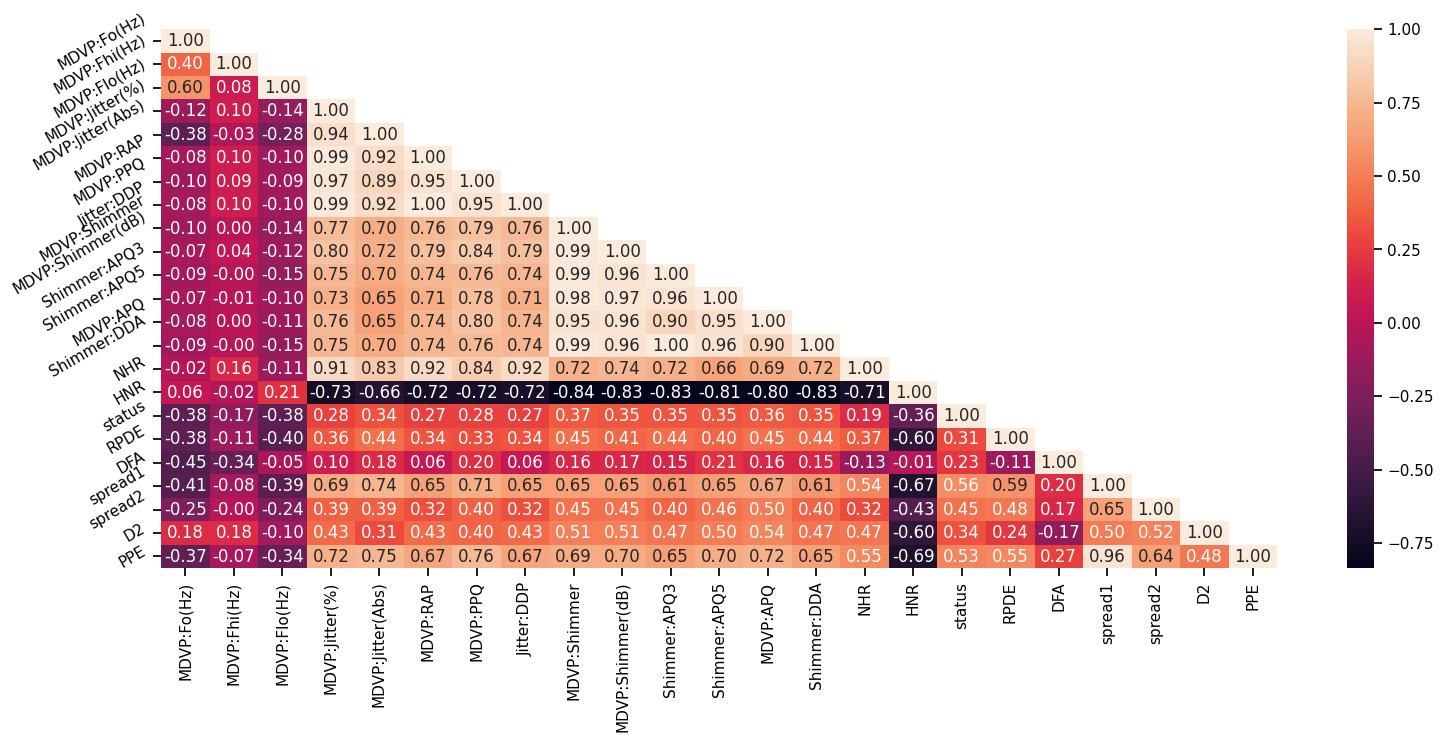

In [26]:
corr = epilepsy.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))

mask = np.zeros_like(corr) # to see the correalation value once
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)  # For label readability
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Train Test Split**

Split the data for training & testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = epilepsy.drop('status', axis = 1)
y = epilepsy['status']

In [29]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [30]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(len(X_train)),print(len(X_test))

156
39


(None, None)

**Selecting Model**

1 . Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RFC_model = RandomForestClassifier(n_estimators = 70)

In [34]:
RFC_model.fit(X_train, y_train)
y_pred = RFC_model.predict(X_test)

In [35]:
accuracy_score = RFC_model.score(X_test , y_test)
print("accuracy_score for random forest is: ",accuracy_score)

accuracy_score for random forest is:  0.9487179487179487


In [36]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified

2

In [37]:
feature_imp = pd.Series(RFC_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

PPE                 0.117094
spread1             0.099479
MDVP:Fo(Hz)         0.099314
MDVP:Fhi(Hz)        0.070514
MDVP:Flo(Hz)        0.062326
Jitter:DDP          0.051995
spread2             0.051887
NHR                 0.039496
MDVP:RAP            0.037812
MDVP:APQ            0.037685
MDVP:Jitter(Abs)    0.037394
D2                  0.037091
Shimmer:APQ5        0.032077
RPDE                0.031228
DFA                 0.030814
Shimmer:DDA         0.030153
MDVP:PPQ            0.026970
HNR                 0.026108
MDVP:Shimmer        0.021528
Shimmer:APQ3        0.020306
MDVP:Jitter(%)      0.019967
MDVP:Shimmer(dB)    0.018763
dtype: float64

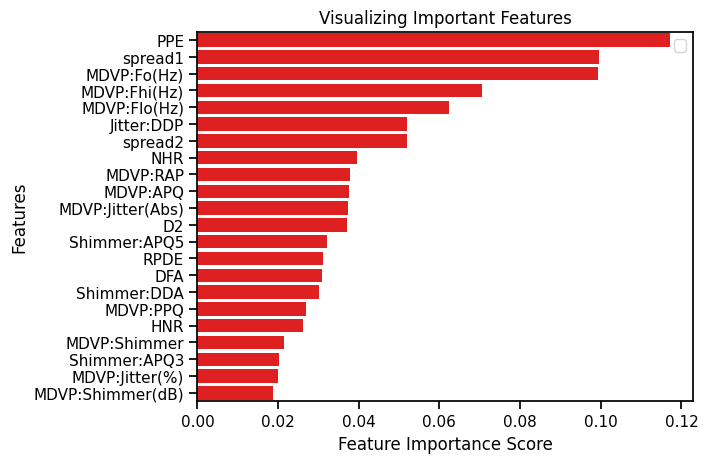

In [39]:
sns.barplot(x=feature_imp, y=feature_imp.index,color='red')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

2 . Decision Tree

In [40]:
# Importing models

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
DT_model = DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=42,min_samples_leaf=6)

In [42]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       random_state=42)

In [43]:
DT_accuracy_score = DT_model.score(X_test , y_test)
print("Decision Tree Accuracy Score: ",DT_accuracy_score)

Decision Tree Accuracy Score:  0.8974358974358975


In [44]:
y_pred = DT_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [45]:
confusion_matrix(y_test,y_pred)

array([[ 5,  2],
       [ 2, 30]])

In [46]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified

4

3 . Gradiant boosting classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score

In [48]:
GBC_model = GradientBoostingClassifier(random_state=42)

In [49]:
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [50]:
GBC_score = GBC_model.score(X_test,y_test)
print("Gradient Boosting Score: ",GBC_score)

Gradient Boosting Score:  0.9230769230769231


In [51]:
y_pred = GBC_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [53]:
confusion_matrix(y_test,y_pred)

array([[ 5,  2],
       [ 1, 31]])

In [52]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified

3

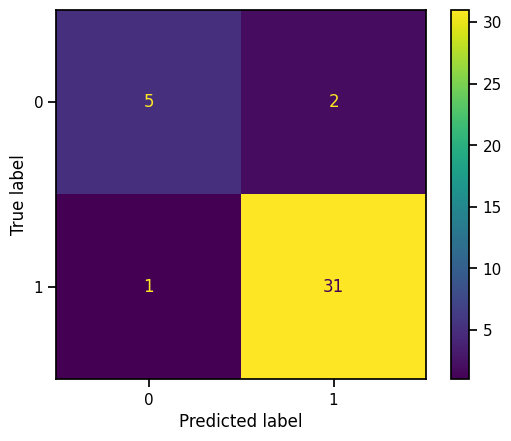

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

4 . Bagging

In [55]:
from sklearn.ensemble import BaggingClassifier

In [56]:
BG_model = BaggingClassifier(estimator=DT_model, n_estimators=50, max_samples=.7)

In [57]:
BG_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=7,
                                                   min_samples_leaf=6,
                                                   random_state=42),
                  max_samples=0.7, n_estimators=50)

In [59]:
y_pred = BG_model.predict(X_test)

In [60]:
BG_score = BG_model.score(X_test , y_test)
print("Baggage Classifier score: ", BG_score)

Baggage Classifier score:  0.8974358974358975


**Conclusion** :

1 . Performed data cleaning, Conducted data visualization & Classified healthy people & people with epilepsy .

2 . Out of all the models used, Random Forest Classifier give the best score, that is 0.94 .